In [ ]:
!pip install -r requirements.txt

In [578]:
#!pip install --upgrade imbalanced-learn 

In [579]:
#!pip freeze > requirements.txt

In [580]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [581]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [582]:
train

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,1976,15591386,Golubova,622,France,Female,35,5,0.00,2,1,0,51112.80
1,0,1420,15705657,Hewitt,535,France,Female,44,2,114427.86,1,1,1,136330.26
2,0,5764,15700965,Toscano,724,France,Female,32,6,0.00,2,1,1,150026.79
3,0,1045,15779059,Timms,670,France,Female,38,4,119624.54,2,1,1,110472.12
4,0,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,1,1,0,71811.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0,1018,15587451,Goold,778,Germany,Male,41,7,139706.31,1,1,0,63337.19
6396,0,1000,15787772,Hansen,759,France,Female,38,1,104091.29,1,0,0,91561.91
6397,0,9468,15734850,Milanesi,676,Spain,Male,36,1,82729.49,1,1,0,113810.12
6398,0,6962,15581968,Reid,745,France,Female,33,1,0.00,2,1,1,174431.01


In [583]:
#Conto i valori nulli di train
missing_values_count = train.isnull().sum()
missing_values_count

Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [584]:
#Conto i valori nulli di test
missing_values_count = test.isnull().sum()
missing_values_count

Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

#Analisi
Segue una analisi delle principali, nonché più interessanti, features del dataset.


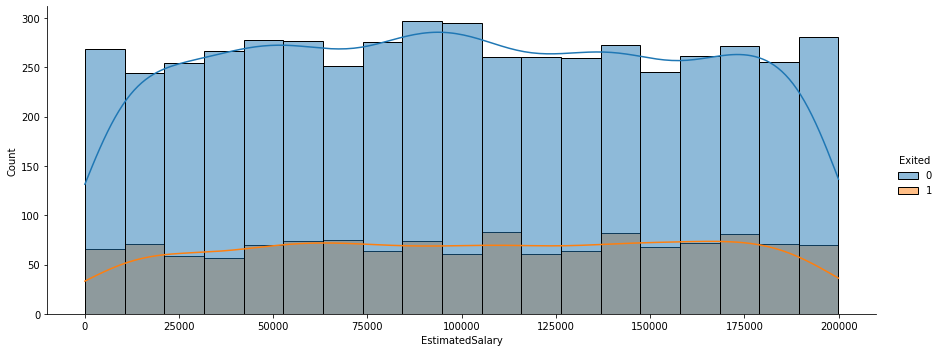

In [585]:
plot = sns.displot(data=train, x="EstimatedSalary", hue="Exited", kde = True, aspect = 2.5)

La distribuzione di **EstimatedSalary** è la medesima per entrambi i valori della label. Discorsi analoghi possono essere fatti anche per le features **CreditScore** e **Tenure**. Per semplicità queste ultime due features non sono state plottate.

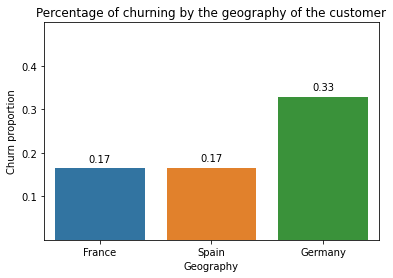

In [586]:
plot = sns.barplot(x = "Geography" , y = "Exited" , data = train , errwidth = 0)

plt.ylim(0,0.5)
plt.yticks([0.1,0.2,0.3,0.4])
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.ylabel("Churn proportion")
plt.title("Percentage of churning by the geography of the customer");

I clienti della Germania hanno una maggiore probabilità di lasciare la propria banca rispetto a quelli di Francia e Spagna.

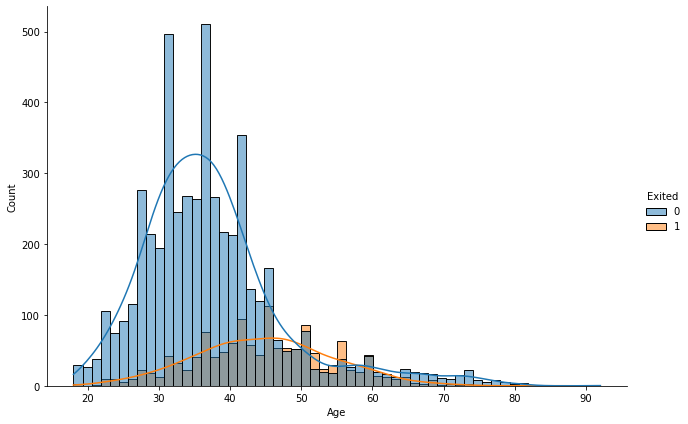

In [587]:
sns.displot(data=train, x="Age", hue="Exited",  height=6, aspect=1.5, kde = True)

Persone nella fascia di età tra i 40-50 hanno maggiore probabilità di abbandonare la propria banca.

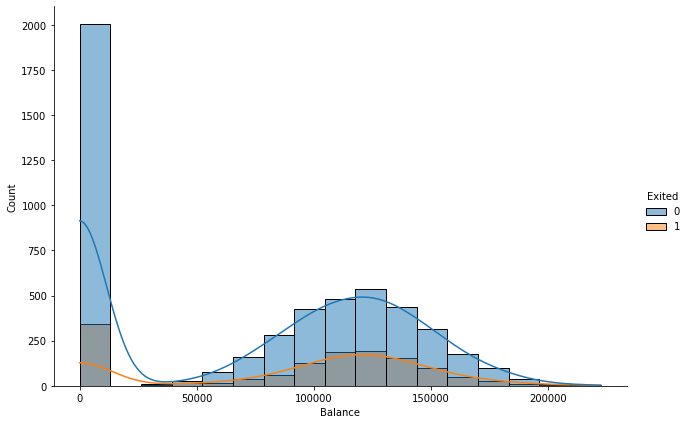

In [588]:
plot = sns.displot(data=train, x="Balance", hue="Exited",  height=6, aspect=1.5, kde = True)

Torniamo al discorso fatto per **EstimatedSalary**. L'unica cosa interessante nel plottare questo grafico per la feature **Balance** è lo spike presente intorno allo ai valori vicino allo 0.

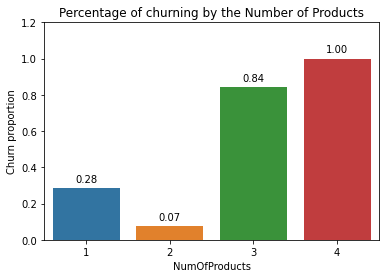

In [589]:
plot = sns.barplot(x = "NumOfProducts" , y = "Exited" , data = train , errwidth = 0)

plt.ylim(0,1.2)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

    
plt.ylabel("Churn proportion")
plt.title("Percentage of churning by the Number of Products");

Come si può notare dal grafico i clienti che hanno 3 e 4 prodotti hanno maggiore probabilità di lasciare la propria banca.

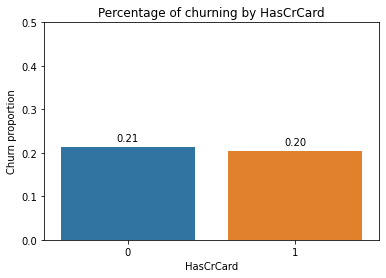

In [590]:
plot = sns.barplot(x = "HasCrCard" , y = "Exited" , data = train , errwidth = 0)

plt.ylim(0,0.5)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Percentage of churning by HasCrCard");   
plt.ylabel("Churn proportion");

La frazione di positivi della label è la medesima per entrambi i valori di **HasCrCard**. **HasCrCard** ha dunque poco potere discriminate, lo si può notare anche dalla bassa correlazione (si veda la matrice di correlazione).

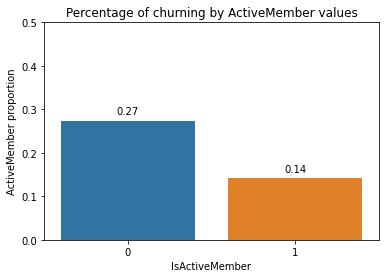

In [591]:
plot = sns.barplot(x = "IsActiveMember" , y = "Exited" , data = train , errwidth = 0)

plt.ylim(0,0.5)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Percentage of churning by ActiveMember values"); 
plt.ylabel("ActiveMember proportion");

A differenza della feature **HasCrCard**, **IsActiveMember** non ha le stesse frazioni per entrambi i valori della label. Questo si traduce in una maggiore correlazione con la label (si veda la matrice di correlazione).

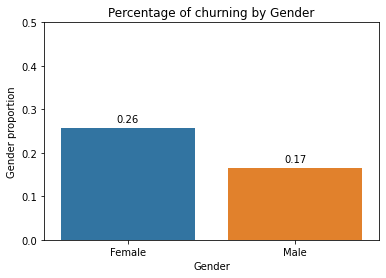

In [592]:
plot = sns.barplot(x = "Gender" , y = "Exited" , data = train , errwidth = 0)

plt.ylim(0,0.5)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.ylabel("Gender proportion");
plt.title("Percentage of churning by Gender"); 

Valgono i discorsi fatti in precedenza anche in questo caso. A quanto pare per qualché motivo il genere maschile tende a preferire di rimanere nel propria banca rispetto a genere femminile.

### Label encoding

In [593]:
#Label encoding per l'unica variabile categorica non binaria, ovvero geography

dummy_geography = pd.get_dummies(train['Geography'], prefix="Geography")
train = pd.merge(
    left=train,
    right=dummy_geography,
    left_index=True,
    right_index=True,
)

dummy_geography = pd.get_dummies(test['Geography'], prefix="Geography")
test = pd.merge(
    left=test,
    right=dummy_geography,
    left_index=True,
    right_index=True,
)
train = train.drop('Geography', axis = 1)
test = test.drop('Geography', axis = 1)

# Label encoding per le variabili continue
le = preprocessing.LabelEncoder()

for l in train:
  if ((l=='Surname')|(l=='Gender')):
    train[l]=le.fit_transform(train[l].astype(str))
    test[l]=le.fit_transform(test[l].astype(str))

train.head()

,Exited,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0,1976,15591386,832,622,0,35,5,0.00,2,1,0,51112.80,1,0,0
1,0,1420,15705657,933,535,0,44,2,114427.86,1,1,1,136330.26,1,0,0
2,0,5764,15700965,2085,724,0,32,6,0.00,2,1,1,150026.79,1,0,0
3,0,1045,15779059,2071,670,0,38,4,119624.54,2,1,1,110472.12,1,0,0
4,0,1679,15569178,1123,570,0,18,4,82767.42,1,1,0,71811.90,1,0,0


## Matrice di correlazione

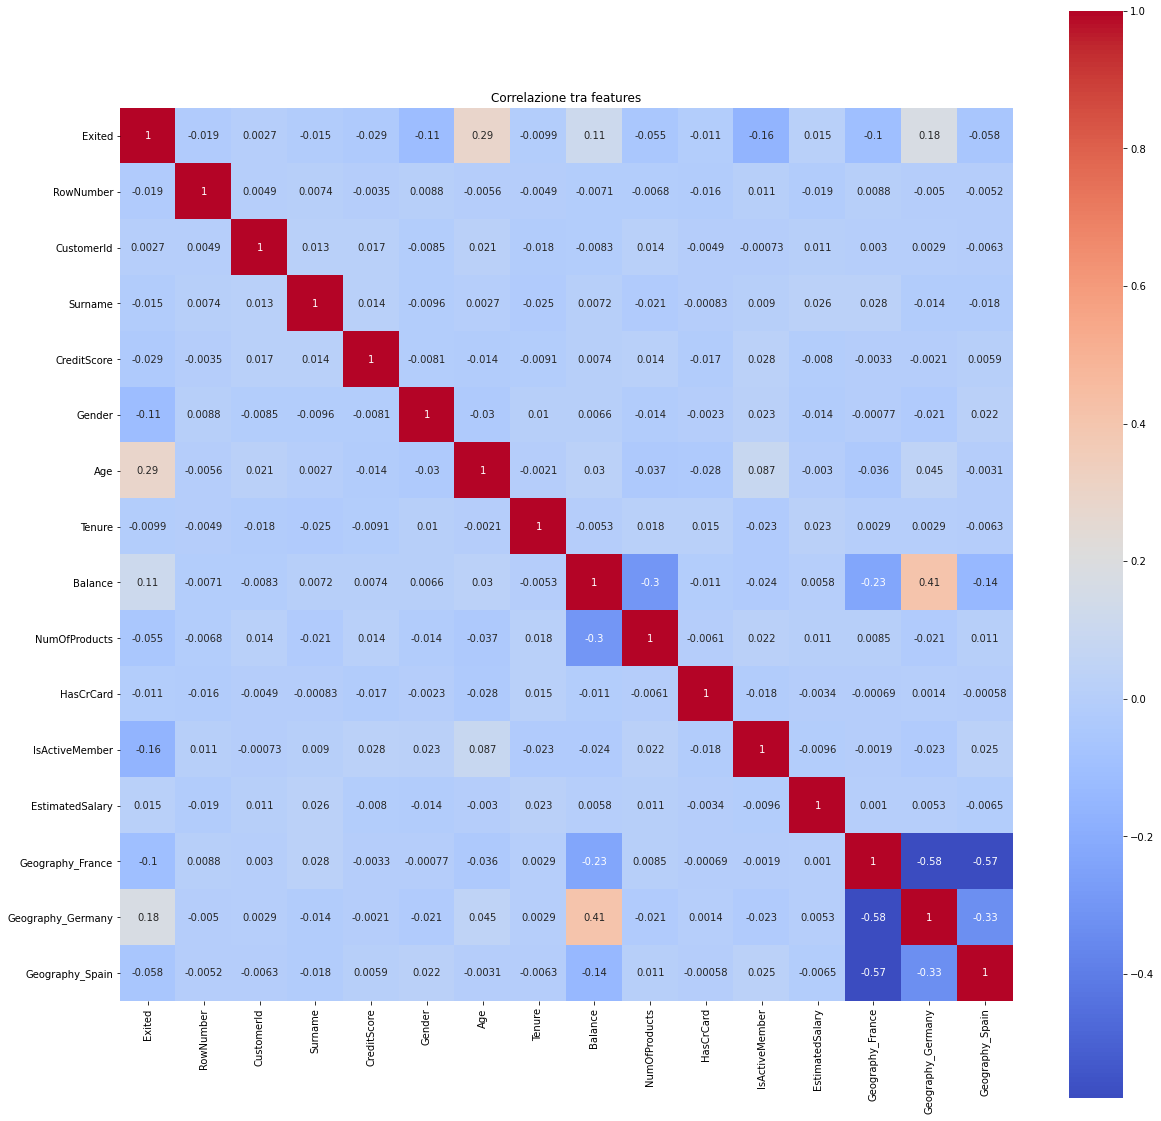

In [594]:
correlation = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlazione tra features')
plt.show()

Come si può notare dalla matrice di correlazione, non ci sono features eccessivamente correlate tra loro.
Per quanto riguarda la correlazione con Exited, possiamo affermare che i valori sono perfettamente in linea con ciò che ci dicevano le distribuzioni rappresentate dai grafici precedenti. Per fare un esempio concreto prendiamo la feature Age: essa infatti ha due distribuzioni relative ai valori della label abbastanza diverse tra loro. Ne segue infatti una correlazione più alta rispetto ad altre features.

Nota: ovviamente si è ignorata l'alta correlazione tra le feature con prefisso geography che derivano dal one hot encoding.
## Drop features
Ho deciso di eliminare le seguente features perché, ritenute poco significative.
* **RowNumber**
* **CustumerID**
* **Surname**

Sono stati fatti ulteriori tentativi di eliminazione di altre features attraverso i valori di correlazione (con la label) più vicini allo zero. Tuttavia i risultati ottenuti erano irrisori o addirittura peggiorativi in termini di performance dei modelli.




In [595]:
train = train.drop("RowNumber", axis = 1)
train = train.drop("CustomerId", axis = 1)
train = train.drop("Surname", axis = 1)

test = test.drop("RowNumber", axis = 1)
test = test.drop("CustomerId", axis = 1)
test = test.drop("Surname", axis = 1)

"""
train = train.drop("Tenure", axis = 1)
test = test.drop("Tenure", axis = 1)

train = train.drop("HasCrCard", axis = 1)
test = test.drop("HasCrCard", axis = 1)
"""



'\ntrain = train.drop("Tenure", axis = 1)\ntest = test.drop("Tenure", axis = 1)\n\ntrain = train.drop("HasCrCard", axis = 1)\ntest = test.drop("HasCrCard", axis = 1)\n'

## Standardizzazione e Feature Engineering

Le features continue sono state standardizzate. La normalizzazione è stata fatta di modo da avere valor medio pari a 0 e deviazione standard uguale a 1.
Inizialmente si è provato a dividere le features continue in fasce, tuttavia in termini di performance dei modelli non si è osservato nessun miglioramento significativo contrariamente a quanto avvenuto per la standardizzazione.

Segue uno dei tentativi per dividere in fasce una features continua (codice commentato e dunque non più usato).

In [596]:
"""
train['EstimatedSalaryBand'] = pd.cut(train['EstimatedSalary'], 5)
train.loc[train['EstimatedSalary'] <= 40066.204, 'EstimatedSalary'] = 0
train.loc[(train['EstimatedSalary'] > 40066.204) & (train['EstimatedSalary'] <= 80042.338), 'EstimatedSalary'] = 1
train.loc[(train['EstimatedSalary'] > 80042.338) & (train['EstimatedSalary'] <= 120018.472), 'EstimatedSalary'] = 2
train.loc[(train['EstimatedSalary'] > 120018.472) & (train['EstimatedSalary'] <= 159994.606), 'EstimatedSalary'] = 3
train.loc[train['EstimatedSalary'] > 159994.606, 'EstimatedSalary'] = 4

test.loc[train['EstimatedSalary'] <= 40066.204, 'EstimatedSalary'] = 0
test.loc[(train['EstimatedSalary'] > 40066.204) & (test['EstimatedSalary'] <= 80042.338), 'EstimatedSalary'] = 1
test.loc[(train['EstimatedSalary'] > 80042.338) & (test['EstimatedSalary'] <= 120018.472), 'EstimatedSalary'] = 2
test.loc[(train['EstimatedSalary'] > 120018.472) & (test['EstimatedSalary'] <= 159994.606), 'EstimatedSalary'] = 3
test.loc[train['EstimatedSalary'] > 159994.606, 'EstimatedSalary'] = 4
train = train.drop("EstimatedSalaryBand", axis = 1)
train.EstimatedSalary.unique()
"""

'\ntrain[\'EstimatedSalaryBand\'] = pd.cut(train[\'EstimatedSalary\'], 5)\ntrain.loc[train[\'EstimatedSalary\'] <= 40066.204, \'EstimatedSalary\'] = 0\ntrain.loc[(train[\'EstimatedSalary\'] > 40066.204) & (train[\'EstimatedSalary\'] <= 80042.338), \'EstimatedSalary\'] = 1\ntrain.loc[(train[\'EstimatedSalary\'] > 80042.338) & (train[\'EstimatedSalary\'] <= 120018.472), \'EstimatedSalary\'] = 2\ntrain.loc[(train[\'EstimatedSalary\'] > 120018.472) & (train[\'EstimatedSalary\'] <= 159994.606), \'EstimatedSalary\'] = 3\ntrain.loc[train[\'EstimatedSalary\'] > 159994.606, \'EstimatedSalary\'] = 4\n\ntest.loc[train[\'EstimatedSalary\'] <= 40066.204, \'EstimatedSalary\'] = 0\ntest.loc[(train[\'EstimatedSalary\'] > 40066.204) & (test[\'EstimatedSalary\'] <= 80042.338), \'EstimatedSalary\'] = 1\ntest.loc[(train[\'EstimatedSalary\'] > 80042.338) & (test[\'EstimatedSalary\'] <= 120018.472), \'EstimatedSalary\'] = 2\ntest.loc[(train[\'EstimatedSalary\'] > 120018.472) & (test[\'EstimatedSalary\'] <= 

Standardizzazione vera e propria delle features **EstimatedSalary** e **Balance**. Si è notato inoltre che è possibile ottenere una feature artificiale sulla base di **Balance** e **EstimatedSalary** chiamata **BalanceRatio**. Tale feature sostituirà **EstimatedSalary**. **BalanceRatio** ha portato un evidente miglioramente nelle performance dei modelli.

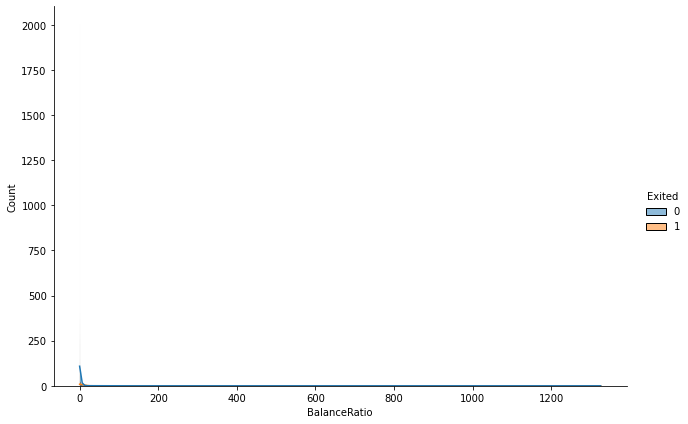

In [597]:
train["BalanceRatio"] = train["Balance"] / train["EstimatedSalary"]
test["BalanceRatio"] = test["Balance"] / test["EstimatedSalary"]
train = train.drop("EstimatedSalary", axis = 1)
test = test.drop("EstimatedSalary", axis = 1)

train["Balance"] = (train["Balance"] - train["Balance"].mean())/train["Balance"].std()
test["Balance"] = (test["Balance"] - test["Balance"].mean())/test["Balance"].std()

plot = sns.displot(data=train, x="BalanceRatio", hue="Exited",  height=6, aspect=1.5, kde = True)

La distribuzione è molto schiacciata, proviamo a farne il logaritmo per ottenere dei valori più significativi.

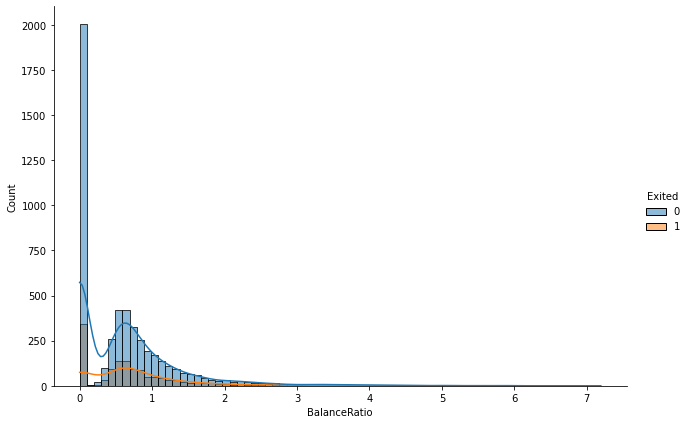

In [598]:
train['BalanceRatio'] = train['BalanceRatio'].apply(np.log1p)
test['BalanceRatio'] = test['BalanceRatio'].apply(np.log1p)
plot = sns.displot(data=train, x="BalanceRatio", hue="Exited",  height=6, aspect=1.5, kde = True)

Normalizzo anche **BalanceRatio**:

In [599]:
train["BalanceRatio"] = (train["BalanceRatio"] - train["BalanceRatio"].mean())/train["BalanceRatio"].std()
test["BalanceRatio"] = (test["BalanceRatio"] - test["BalanceRatio"].mean())/test["BalanceRatio"].std()

## Classificazione

Modelli testati:

* Decision Tree
* KNN
* Logistic Regression
* Random Forest
* AdaBoost
* Support Vector Machine
* Rete Neurale

Alcuni di questi modelli sono stati studiati nel corso di Machine Learning. Verso la fine del notebook per ciascun modello/algoritmo non spiegato nel corso di IA ci sarà una breve descrizione.




In [600]:
trainY=train['Exited']
testY=test['Exited']
trainX=train.drop('Exited', axis=1)
testX=test.drop('Exited', axis=1)

In [601]:

dt = DecisionTreeClassifier(max_leaf_nodes=12,random_state=8, criterion='entropy')
dt.fit(trainX, trainY)
prediction = dt.predict(testX)
print('Accuracy:', (accuracy_score(testY, prediction)* 100), "%")

Accuracy: 85.125 %


In [602]:
KNC = KNeighborsClassifier(n_neighbors=13)
KNC.fit(trainX, trainY)
prediction = KNC.predict(testX)
print('Accuracy:', (accuracy_score(testY, prediction)* 100), "%")

Accuracy: 80.8125 %


In [603]:
lr = LogisticRegression(max_iter = 10000, random_state=30)
lr.fit(trainX, trainY)
prediction = lr.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

Accuracy: 81.1875 %


In [604]:
forest = RandomForestClassifier()
forest.fit(trainX, trainY)
prediction = forest.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

Accuracy: 86.5625 %


In [605]:
abc = AdaBoostClassifier()
abc.fit(trainX, trainY)
prediction = abc.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

Accuracy: 85.75 %


In [606]:
svm = SVC(C=10, kernel="rbf")
svm.fit(trainX, trainY)
prediction = svm.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

Accuracy: 79.9375 %


(6400, 12)
Epoch 1/200
160/160 [==============================] - 3s 3ms/step - loss: 6.1176 - accuracy: 0.6241 - val_loss: 2.3250 - val_accuracy: 0.3141
Epoch 2/200
160/160 [==============================] - 0s 1ms/step - loss: 1.5170 - accuracy: 0.6918 - val_loss: 1.0579 - val_accuracy: 0.7930
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0508 - accuracy: 0.7482 - val_loss: 0.8169 - val_accuracy: 0.7937
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.8448 - accuracy: 0.7869 - val_loss: 0.7459 - val_accuracy: 0.7945
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.7571 - accuracy: 0.7828 - val_loss: 0.7082 - val_accuracy: 0.7945
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.7887 - val_loss: 0.7098 - val_accuracy: 0.7937
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.7951 - val_loss: 0.6337 - val_accur

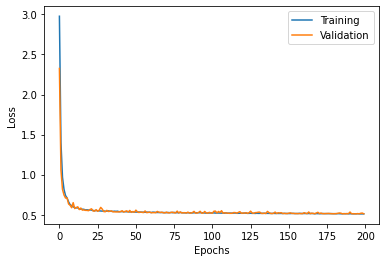

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (32, 32)                  416       
_________________________________________________________________
dense_32 (Dense)             (32, 1)                   33        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [607]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.optimizers import SGD


model = Sequential()
Dense(64, activation='elu', kernel_initializer=tf.keras.initializers.he_normal,
                  input_shape=(12,), kernel_regularizer='l1'),
model.add(Dense(32, activation='elu', kernel_regularizer='l1'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid',))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01 ), metrics=['accuracy'])

print(trainX.shape)
network_history = model.fit(trainX, trainY, batch_size=32, validation_split=0.20, epochs=200, verbose=1)

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    plt.show()

plot_history(network_history)
model.summary()


In [608]:
results = model.evaluate(testX, testY, batch_size=32)

50/50 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.8037


## Matrice di Confusione
A titolo di esempio andiamo ad esaminare la matrice di confusione per il miglior modello, ovvero forest.


Text(0.5, 15.0, 'Predicted label')

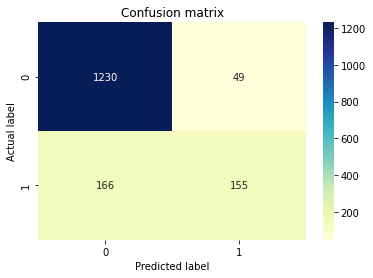

In [609]:
predY = forest.predict(testX)

cnf_matrix = metrics.confusion_matrix(testY, predY)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Come possiamo ben notare la percentuale di falsi positivi è decisamente inferiore rispetto a quella dei falsi negativi.
Per quale motivo questo accade? Il motivo è che non ci sono abbastanza esempi positivi. Il grafico seguente lo evidenzia.

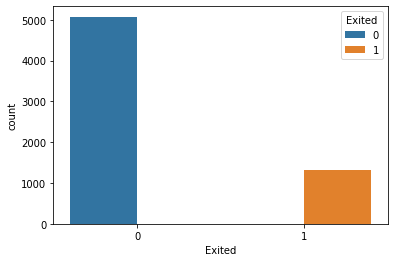

In [610]:
sns.countplot(x = "Exited", hue="Exited", data = train)

Sempre a titolo di esempio è stato preso in considerazione un'altro modello, ovvero KNN. Notare come i falsi negativi siano alti! Addirittura peggio di RandomForest!

Text(0.5, 15.0, 'Predicted label')

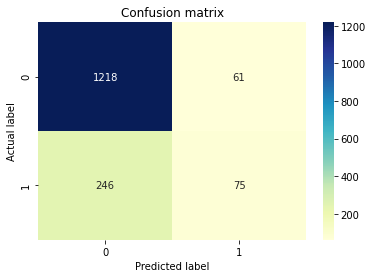

In [611]:
predY = KNC.predict(testX)

cnf_matrix = metrics.confusion_matrix(testY, predY)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Per provare a risolvere il problema si possono adottare delle tecniche di oversampling come ad esempio SMOTE.

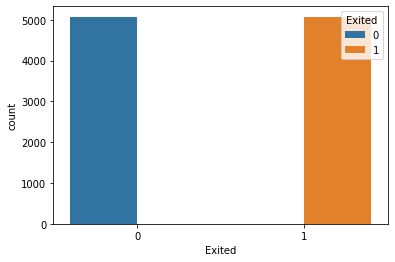

In [612]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy = 'minority', random_state = 13)
X_train, y_train = smote.fit_resample(trainX, trainY)
y_train.name = 'Exited'
y_train = y_train.to_frame()
sns.countplot(x = "Exited", hue="Exited", data = y_train)

Adesso i valori della label sono equamente distribuiti.
Andiamo a vedere come si comporta il classificatore random forest con il nuovo dataset:

In [613]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
prediction = forest.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 83.3125 %


Text(0.5, 15.0, 'Predicted label')

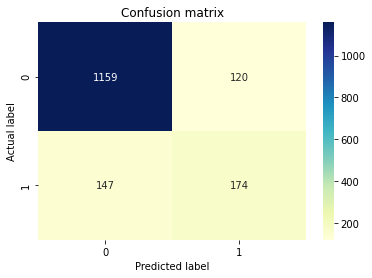

In [614]:
predY = forest.predict(testX)

cnf_matrix = metrics.confusion_matrix(testY, predY)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Sebbene abbiamo avuto un peggioramente complessivo delle performace, adesso otteniamo in proporzione meno falsi negativi.

## Spiegazione dei classificatori non trattati nel corso di IA:

**AdaBoost:**

Tecnica che consiste nel combinare più weak classifier per riuscire a costruire un classificatore più performante. Requisito fondamentale è che ogni singolo weak classifier sia migliore di un classificatore random. Solitamente gli weak classifier sono decision stump, le cui previsioni vengono combinate linearmente per produrre la previsione finale. I pesi associati a ciascun weak classifier sono soggetti ovviamente ad addestramento.
Il peso viene calcolato di volta in volta in base al classificaton error e indica in buona sostanza il grado di affidabilità del weak classifier in questione. Tramite un procedimento di indentificazione dei punti critici i weak classifiers sono addestrati in modo tale che il weak classifier successivo si concentri dove i classificatori precedenti erano più deboli. 

**RandomForest:**

Molto simile a **AdaBoost**, facendo parte della famiglia di algoritmi di classificazione che fanno uso del boosting. La differenza principale (non l'unica) è che RandomForest fa uso di decision tree come weak classifier.

**Support Vector Machine**

A differenza di altre soluzione le SVM tentano di risolvere il task di classificazione andando identificare direttamente quelli che sono gli iperpiani di separazioni tra classi. Risolvere il problema da un punto di vista geometrico rende le SVM particolarmente adatte a scalare, infatti le soluzioni vengono espresse solamente mediante alcuni datapoint chiamati per l'appunto support vector. I support vector identificano l'iperpiano di separazione con il più ampio margine. Avere un ampio margine si traduce in una buona generalizzazione. Vista la formulazione del problema, solitamente vengono usati algoritmi di programmazione quadratica per la risoluzione. Il parametro C fa riferimento al fatto che i vincoli del margine possono essere parzialmente rilassati, permettendo al classificatore di commettere errori durante il calcolo dei support vector.
Le SVM possono far uso anche di kernel function (come la rbf), che permettono di trovare un iperpiano di separazione in uno spazio d-dimensionale più ampio, per poi tradurre la soluzione nello spazio originario. La soluzione trovata nello spazio originale corrisponderà ad un separatore non lineare (non più un semplice iperpiano).